In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import math

In [2]:
# local path the file is not relative humidity but 2m dewpoint temperature

local_path ='/Users/fabienaugsburger/myCloud/Unil/Master/Thesis/Datasets/Curnagl/ERA5_1990_2m_dewpoint_temperature.nc'
#gusts = xr.open_dataset('Reanalysis/gust/*.nc')

servor_path = '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ECMWF/ERA5/fabien2/ERA5/ERA5_1990_relative_humidity.nc'

relative_humidity = xr.open_dataset(local_path)

In [3]:
relative_humidity.longitude
relative_humidity['longitude'] = relative_humidity['longitude'].where(relative_humidity['longitude'] >= 0, relative_humidity['longitude'] + 360)
relative_humidity['d2m']=relative_humidity['d2m']-273.15

In [4]:
# --> make a function
tracks_path_servor = '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ECMWF/WS_fabien/storms_dates.txt'
tracks_path_local = '/Users/fabienaugsburger/myCloud/Unil/Master/Thesis/Datasets/storms_dates.txt'

tracks = pd.read_csv(tracks_path_local, sep='\t', header=None)

# name each column of the tracks dataframe

tracks.columns = ['year', 'monthdayhour', 'month', 'day', 'event','lon', 'lat', 'total_storms', 'long_dates']

#lon = tracks[5, 0:11]
#lon= np.array(tracks[5])
lon = tracks['lon'][1:63].to_numpy()
lonx = [float(obj.replace(',','.')) for obj in lon]
lat = tracks['lat'][1:63].to_numpy()
latx = np.array([float(obj.replace(',','.')) for obj in lat])

In [12]:
# second storm NOT WORKING

lon = tracks['lon'][63:115].to_numpy()
lonx = [float(obj.replace(',','.')) for obj in lon]
lat = tracks['lat'][63:115].to_numpy()
latx = np.array([float(obj.replace(',','.')) for obj in lat])

In [13]:
# square --> make a function

pos = arr = np.stack((lonx, latx), axis=-1)

tc_irad = np.empty((len(pos), 4))
tc_irad[:,0]=pos[:,0]-4
tc_irad[:,1]=pos[:,0]+4
tc_irad[:,2]=pos[:,1]-4
tc_irad[:,3]=pos[:,1]+4

tc_irad [tc_irad < 0] += 360

In [ ]:
'''first_20.sel(longitude=slice(335,345))'''

In [7]:
# start and end of each storm

# Initialize lists to store start and end dates for each storm
start_dates = []
end_dates = []

# Flag to determine if the storm has started
storm_started = False
start_date = None

for i in range(len(tracks)):
    if tracks['event'][i] == 'FAUX':
        if not storm_started:  # Start of a storm
            start_date = tracks['long_dates'][i]
            storm_started = True
        else:  # End of a storm
            end_dates.append(tracks['long_dates'][i - 1])
            start_dates.append(start_date)
            start_date = tracks['long_dates'][i]
    elif storm_started and i == len(tracks) - 1:  # Last event in the storm
        end_dates.append(tracks['long_dates'][i])
        start_dates.append(start_date)

# Create a new DataFrame to store start and end dates for each storm
temp = {'start_date': start_dates, 'end_date': end_dates}
storms_start_end = pd.DataFrame(temp)

# to check if it worked, the column 'total_storms' should be equal to the number of rows in the dataframe

print(tracks['total_storms'][1], len(storms_start_end))

'''start = tracks[0,8]
end = tracks[63,8]
first_storm = relative_humidity.sel(time=slice(start,end))
LONE, LONW, LATN, LATS = tc_irad[0,:]
print(tc_irad)
'''
#first_storm = first_storm.sel(latitude=slice(LATS,LATN), longitude=slice(LONE,LONW))

96 96


'start = tracks[0,8]\nend = tracks[63,8]\nfirst_storm = relative_humidity.sel(time=slice(start,end))\nLONE, LONW, LATN, LATS = tc_irad[0,:]\nprint(tc_irad)\n'

In [ ]:
'''first_storm.sel(latitude=slice(90,0))''' # order matters !

In [15]:
n_time = len(first_storm.time)
'''minLAT = 38.657398
minLON = 350
maxLAT = 60.181171
maxLON = 40

print(maxLAT, minLAT, maxLON, minLON)'''

'minLAT = 38.657398\nminLON = 350\nmaxLAT = 60.181171\nmaxLON = 40\n\nprint(maxLAT, minLAT, maxLON, minLON)'

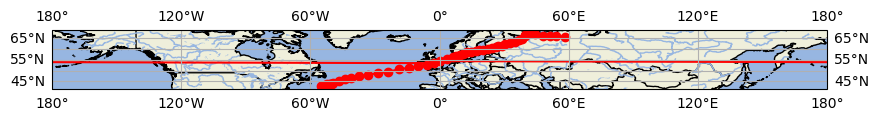

In [16]:
# show the track of the storm on the map

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

'''it_min = 19
it_max = 20'''

# plot the longitude and latitude of the storm
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)

#ax.set_extent([minLON, maxLON, minLAT, maxLAT])

ax.plot(lonx, latx, color='red', marker='o', transform=ccrs.PlateCarree())

IndexError: index 52 is out of bounds for axis 0 with size 52

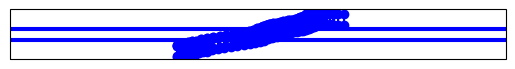

In [17]:
# plot the 62 squares around the storm and plot it on the map
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

for i in range(n_time):
    LONE, LONW, LATN, LATS = tc_irad[i, :]
    ax.plot([LONE, LONE, LONW, LONW, LONE], [LATS, LATN, LATN, LATS, LATS], color='blue', marker='o', transform=ccrs.PlateCarree())

ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)
plt.show()

[301.020905, 38.657398, 62.181171, 69.525337]
2.0134350000000003 38.657398 361.285187 71.417984
[2.0134350000000003, 38.657398, 361.285187, 71.417984]


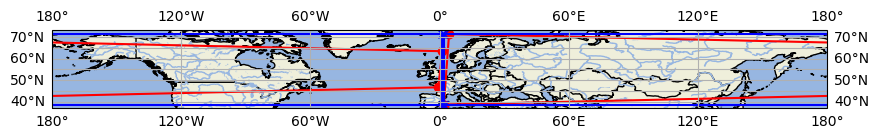

In [18]:
print([tc_irad[0,0], tc_irad[0,2], tc_irad[-1,1], tc_irad[-1,3]])
print(min(tc_irad[:,0]), min(tc_irad[:,2]), max(tc_irad[:,1]), max(tc_irad[:,3]))

# plot min and max longitudes and latitudes of the storm

plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)

ax.plot([min(tc_irad[:,0]), max(tc_irad[:,0]), max(tc_irad[:,1]), min(tc_irad[:,1]), min(tc_irad[:,0])], [min(tc_irad[:,2]), min(tc_irad[:,3]), max(tc_irad[:,2]), max(tc_irad[:,3]), min(tc_irad[:,2])], color='red', marker='o', transform=ccrs.PlateCarree())
ax.plot([min(tc_irad[:,0]), max(tc_irad[:,1]), max(tc_irad[:,1]), min(tc_irad[:,0]), min(tc_irad[:,0])], [min(tc_irad[:,2]), min(tc_irad[:,2]), max(tc_irad[:,3]), max(tc_irad[:,3]), min(tc_irad[:,2])], color='blue', marker='x', transform=ccrs.PlateCarree())

# extend of this storm is the following :

print([min(tc_irad[:,0]), min(tc_irad[:,2]), max(tc_irad[:,1]), max(tc_irad[:,3])])
minLAT = min(tc_irad[:,2])
minLON = min(tc_irad[:,0])
maxLAT = max(tc_irad[:,3])
maxLON = max(tc_irad[:,1])

RminLAT = math.floor(min(tc_irad[:,2]))
RminLON = math.floor(min(tc_irad[:,0]))
RmaxLAT = math.ceil(max(tc_irad[:,3]))
RmaxLON = math.ceil(max(tc_irad[:,1]))

In [ ]:
# make a gif of the storm and the 62 squares around it

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)
ax.set_extent([minLON, maxLON, minLAT, maxLAT])
ax.plot()

def animate(i):
    LONE, LONW, LATN, LATS = tc_irad[i, :]
    ax.plot([LONE, LONE, LONW, LONW, LONE], [LATS, LATN, LATN, LATS, LATS], color='blue', marker='o', transform=ccrs.PlateCarree())
    ax.plot(lonx[i], latx[i], color='red', marker='o', transform=ccrs.PlateCarree())
    return ax

anim = FuncAnimation(fig, animate, frames=n_time, interval=200)
anim.save('storm_01_90_2.gif', dpi=80, writer='imagemagick')


In [19]:
# slice the first_storm dataset with the min and max longitudes and latitudes of the storm

first_storm = relative_humidity.sel(time=slice(storms_start_end['start_date'][0],storms_start_end['end_date'][0]))
first_storm = first_storm.sel(latitude=slice(RmaxLAT,RminLAT), longitude=slice(RminLON,RmaxLON))
first_storm

<xarray.Dataset>
Dimensions:    (longitude: 1432, latitude: 137, time: 62)
Coordinates:
  * longitude  (longitude) float32 2.0 2.25 2.5 2.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 72.0 71.75 71.5 71.25 ... 38.5 38.25 38.0
  * time       (time) datetime64[ns] 1990-01-21T03:00:00 ... 1990-01-28T18:00:00
Data variables:
    d2m        (time, latitude, longitude) float32 1.97 2.055 ... 11.41 11.22
Attributes:
    Conventions:  CF-1.6
    history:      2023-10-13 21:02:30 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [20]:
# Create empty lists to store sliced data
sliced_data = []

# Loop through each time step
for i in range(len(lon)):
    # Get the cyclone's coordinates at the current time step
    cyclone_lon = lonx[i]
    cyclone_lat = latx[i]

    # Slice the variable data using the cyclone's coordinates at this time step
    variable_at_cyclone = first_storm['d2m'].sel(latitude=cyclone_lat, longitude=cyclone_lon, method='nearest')

    # Append the sliced data to the list
    sliced_data.append(variable_at_cyclone)

# Combine the sliced data into a new xarray dataset
sliced_dataset = xr.concat(sliced_data, dim='time')

In [23]:
sliced_dataset

<xarray.DataArray 'd2m' (time: 3224)>
array([-2.8833313 ,  0.60665894,  3.787323  , ..., -5.909363  ,
       -5.0799255 , -2.7954407 ], dtype=float32)
Coordinates:
    longitude  (time) float32 305.0 305.0 305.0 305.0 ... 58.25 58.25 58.25
    latitude   (time) float32 42.75 42.75 42.75 42.75 ... 65.5 65.5 65.5 65.5
  * time       (time) datetime64[ns] 1990-01-21T03:00:00 ... 1990-01-28T18:00:00

AttributeError: 'DataArray' object has no attribute 'd2m'

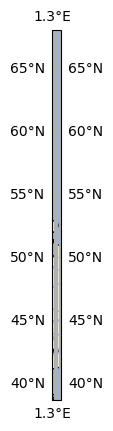

In [22]:
# plot the d2m variable at time step 0 over the limits of the storm

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)
ax.set_extent([minLON, maxLON, minLAT, RmaxLAT-4])

#first_storm.d2m[0,:,:].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', vmin=-40, vmax=25)
sliced_dataset.d2m[0,:,:].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', vmin=-40, vmax=25)

In [ ]:
n_time = len(first_storm.time)

In [ ]:
# plot the d2m variable for each time step over the limits of the storm

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)
ax.set_extent([minLON, maxLON, minLAT, maxLAT])
ax.plot()

def animate(i):
    LONE, LONW, LATN, LATS = tc_irad[i, :]
    ax.plot([LONE, LONE, LONW, LONW, LONE], [LATS, LATN, LATN, LATS, LATS], color='blue', marker='o', transform=ccrs.PlateCarree())
    ax.plot(lonx[i], latx[i], color='red', marker='o', transform=ccrs.PlateCarree())

    plt.contourf(first_storm.longitude, first_storm.latitude, first_storm['d2m'].isel(time=i), cmap='coolwarm')

    cbar = plt.colorbar()
    cbar.set_label('Temperature (d2m)')  # Set the colorbar label
    cbar.set_clim(-40, 25)  # Set the color limits for the colorbar

    return ax

anim = FuncAnimation(fig, animate, frames=n_time, interval=200)
anim.save('storm_01_90_d2m.gif', dpi=80, writer='imagemagick')